Import Packages

In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [22]:
parent_dir = '../../data/ping_pong/'

NMSG = 500_000
ITERATIONS = 15
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}2/ping_pong_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}2/ping_pong_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}2/ping_pong_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}2/ping_pong_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [23]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Mar 15 14:13:33 2025 +0100) (508.89ms ela...,14.000,0.0639,1.210,16.62,1.68,78.89,69.29 C,Nominal
1,(Sat Mar 15 14:13:34 2025 +0100) (505.74ms ela...,8.470,0.0497,0.808,12.12,1.20,74.64,69.29 C,Nominal
2,(Sat Mar 15 14:13:35 2025 +0100) (505.29ms ela...,2.110,0.1190,0.911,4.59,0.73,42.11,68.77 C,Nominal
3,(Sat Mar 15 14:13:35 2025 +0100) (507.89ms ela...,0.636,0.0520,0.732,2.89,0.41,26.40,68.77 C,Nominal
4,(Sat Mar 15 14:13:36 2025 +0100) (508.48ms ela...,1.440,0.0000,0.560,3.37,0.27,20.61,68.25 C,Nominal


In [24]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(180, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Mar 15 14:13:44 2025 +0100) (56.85ms elap...,37.4,0.0000,1.850,40.04,3.99,99.75,66.45 C,Nominal
1,(Sat Mar 15 14:13:44 2025 +0100) (55.49ms elap...,40.8,0.0924,2.500,43.47,3.99,99.86,67.40 C,Nominal
2,(Sat Mar 15 14:13:45 2025 +0100) (55.79ms elap...,39.1,0.1290,0.990,44.03,3.99,99.87,67.40 C,Nominal
3,(Sat Mar 15 14:13:45 2025 +0100) (55.27ms elap...,35.2,0.0000,0.877,39.98,4.00,100.06,67.40 C,Nominal
4,(Sat Mar 15 14:13:45 2025 +0100) (55.03ms elap...,38.3,0.2460,1.210,43.30,4.00,99.92,67.40 C,Nominal


In [25]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Mar 15 14:18:23 2025 +0100) (508.95ms ela...,7.590,0.0842,1.010,9.93,0.99,52.81,54.41 C,Nominal
1,(Sat Mar 15 14:18:23 2025 +0100) (504.86ms ela...,13.800,0.0956,0.993,16.82,1.85,98.52,54.41 C,Nominal
2,(Sat Mar 15 14:18:24 2025 +0100) (504.85ms ela...,4.950,0.0945,1.140,7.50,1.04,65.96,56.41 C,Nominal
3,(Sat Mar 15 14:18:24 2025 +0100) (508.32ms ela...,0.571,0.0487,0.719,2.78,0.40,25.58,56.41 C,Nominal
4,(Sat Mar 15 14:18:25 2025 +0100) (508.88ms ela...,1.270,0.0000,0.554,3.16,0.24,19.61,56.09 C,Nominal


In [26]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(102, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Mar 15 14:18:34 2025 +0100) (56.81ms elap...,20.4,0.000,1.030,22.88,2.20,96.23,55.51 C,Nominal
1,(Sat Mar 15 14:18:34 2025 +0100) (55.17ms elap...,22.1,0.000,0.720,24.13,2.12,99.62,55.51 C,Nominal
2,(Sat Mar 15 14:18:34 2025 +0100) (55.49ms elap...,23.1,0.198,0.874,25.72,2.21,95.26,55.51 C,Nominal
3,(Sat Mar 15 14:18:34 2025 +0100) (55.99ms elap...,22.3,0.388,1.080,25.16,2.20,95.09,55.51 C,Nominal
4,(Sat Mar 15 14:18:34 2025 +0100) (55.58ms elap...,25.0,0.104,1.320,27.40,2.69,95.49,55.51 C,Nominal


Clean the Data

In [27]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [28]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [29]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-15 14:13:33,14.000,0.0639,1.210,16.62,1.68,78.89,69.29,Nominal,508.89
1,2025-03-15 14:13:34,8.470,0.0497,0.808,12.12,1.20,74.64,69.29,Nominal,505.74
2,2025-03-15 14:13:35,2.110,0.1190,0.911,4.59,0.73,42.11,68.77,Nominal,505.29
3,2025-03-15 14:13:35,0.636,0.0520,0.732,2.89,0.41,26.40,68.77,Nominal,507.89
4,2025-03-15 14:13:36,1.440,0.0000,0.560,3.37,0.27,20.61,68.25,Nominal,508.48


In [30]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(180, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-15 14:13:44,37.4,0.0000,1.850,40.04,3.99,99.75,66.45,Nominal,56.85
1,2025-03-15 14:13:44,40.8,0.0924,2.500,43.47,3.99,99.86,67.40,Nominal,55.49
2,2025-03-15 14:13:45,39.1,0.1290,0.990,44.03,3.99,99.87,67.40,Nominal,55.79
3,2025-03-15 14:13:45,35.2,0.0000,0.877,39.98,4.00,100.06,67.40,Nominal,55.27
4,2025-03-15 14:13:45,38.3,0.2460,1.210,43.30,4.00,99.92,67.40,Nominal,55.03


In [31]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-15 14:18:23,7.590,0.0842,1.010,9.93,0.99,52.81,54.41,Nominal,508.95
1,2025-03-15 14:18:23,13.800,0.0956,0.993,16.82,1.85,98.52,54.41,Nominal,504.86
2,2025-03-15 14:18:24,4.950,0.0945,1.140,7.50,1.04,65.96,56.41,Nominal,504.85
3,2025-03-15 14:18:24,0.571,0.0487,0.719,2.78,0.40,25.58,56.41,Nominal,508.32
4,2025-03-15 14:18:25,1.270,0.0000,0.554,3.16,0.24,19.61,56.09,Nominal,508.88


In [32]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(102, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-15 14:18:34,20.4,0.000,1.030,22.88,2.20,96.23,55.51,Nominal,56.81
1,2025-03-15 14:18:34,22.1,0.000,0.720,24.13,2.12,99.62,55.51,Nominal,55.17
2,2025-03-15 14:18:34,23.1,0.198,0.874,25.72,2.21,95.26,55.51,Nominal,55.49
3,2025-03-15 14:18:34,22.3,0.388,1.080,25.16,2.20,95.09,55.51,Nominal,55.99
4,2025-03-15 14:18:34,25.0,0.104,1.320,27.40,2.69,95.49,55.51,Nominal,55.58


Visualize the Data

In [33]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    
    # idle_df["Elapsed Time (s)"] = (idle_df["Timestamp"] - idle_df["Timestamp"].iloc[0]).dt.total_seconds()
    # bench_df["Elapsed Time (s)"] = (bench_df["Timestamp"] - bench_df["Timestamp"].iloc[0]).dt.total_seconds()

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


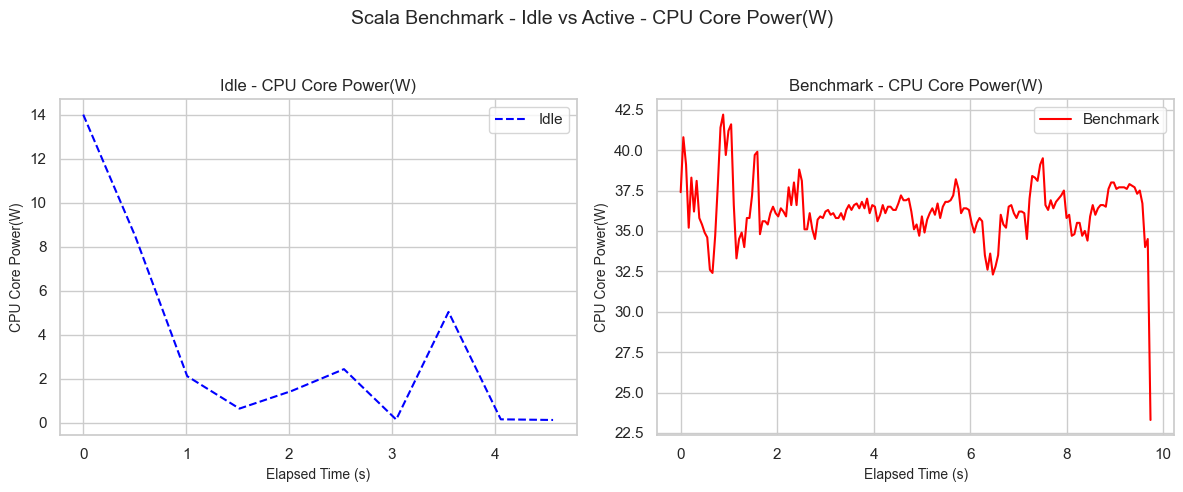

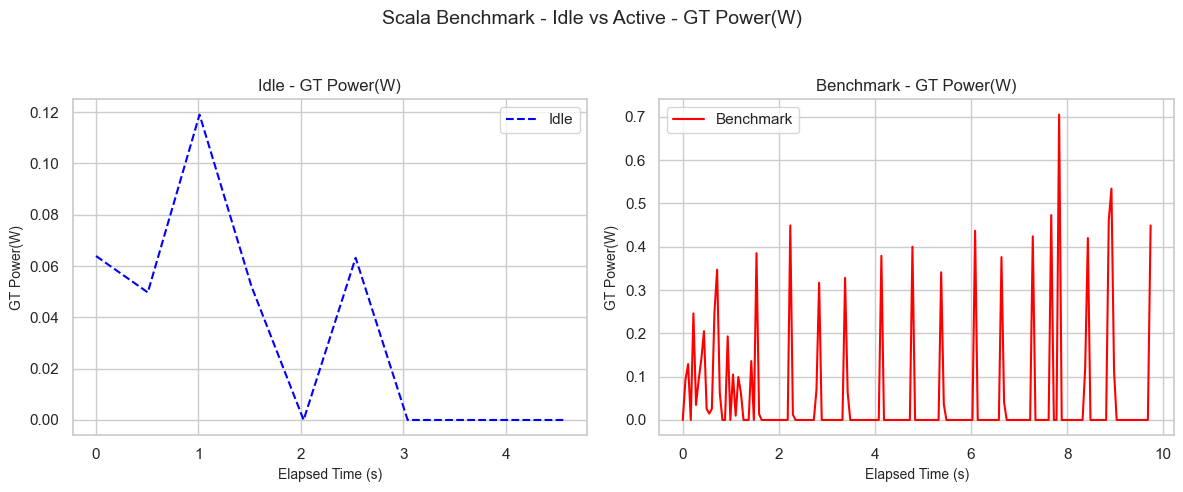

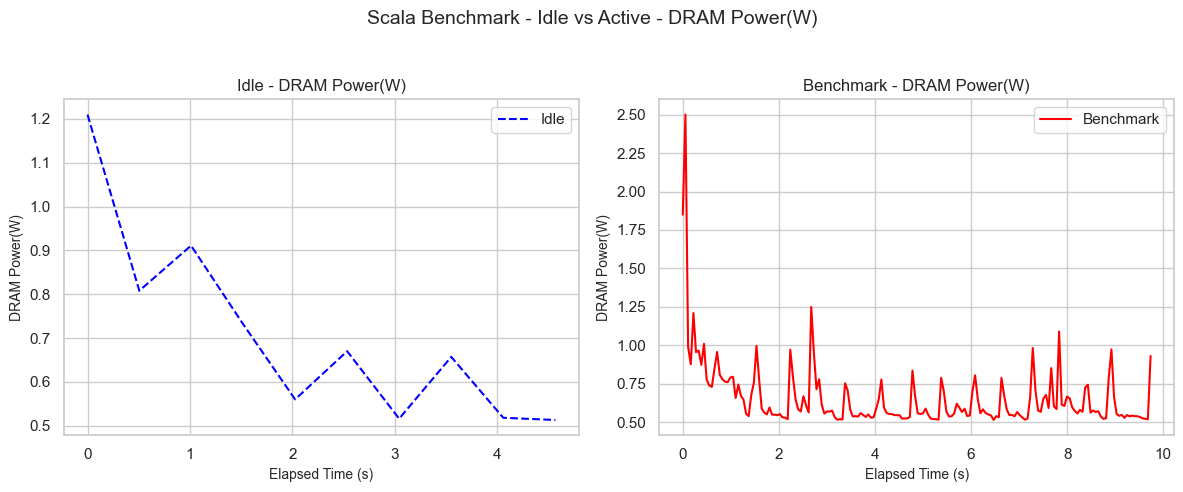

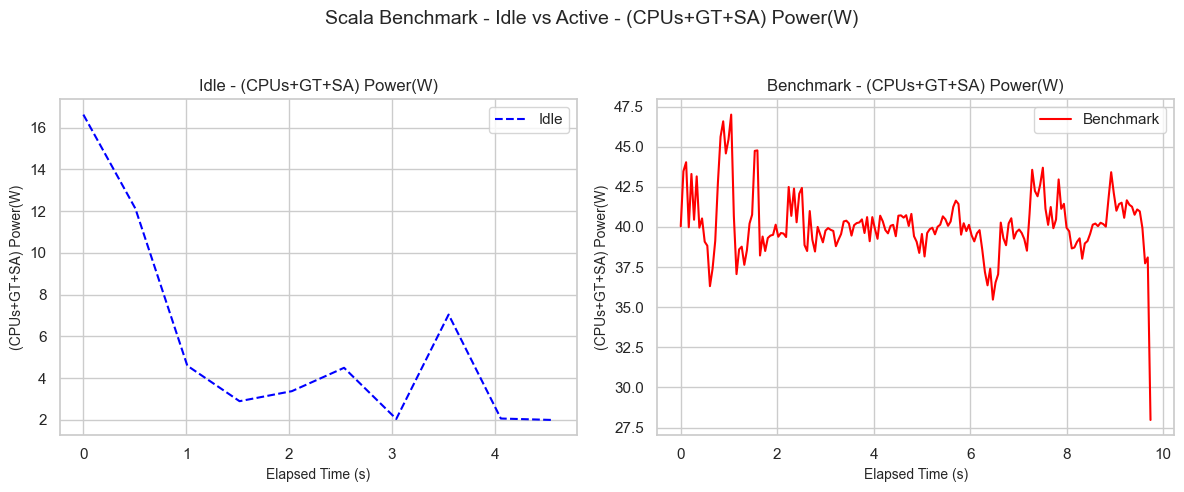

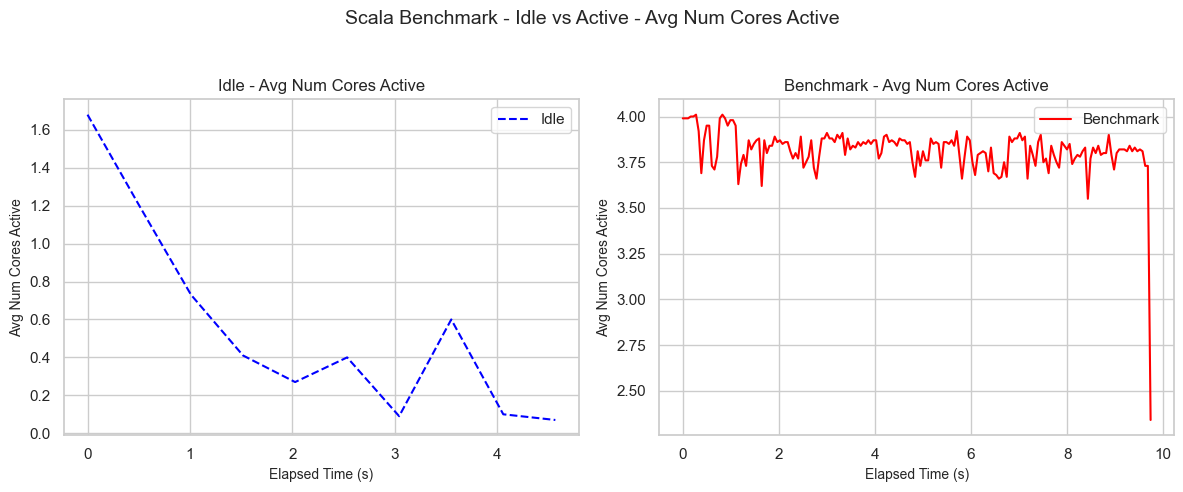

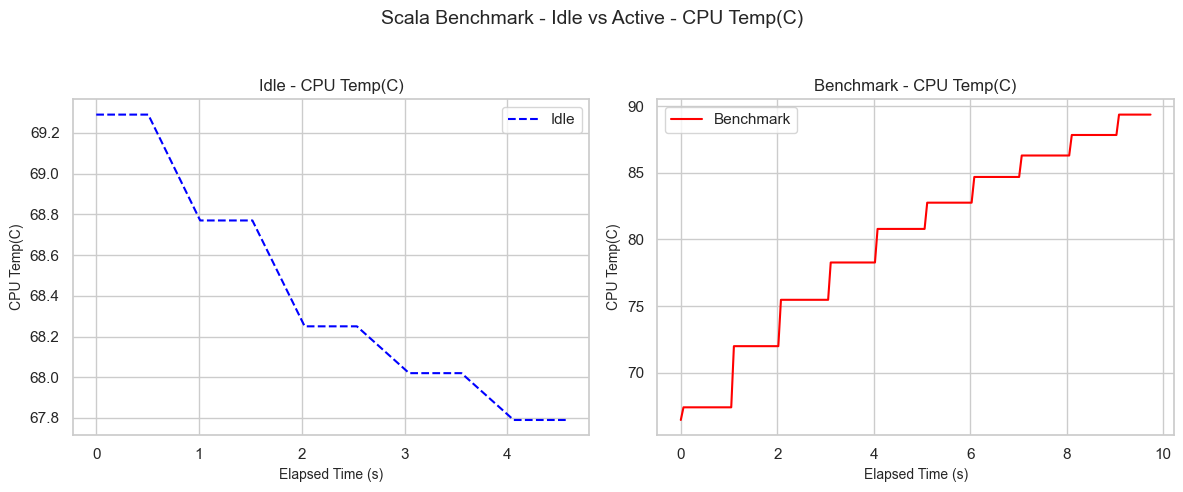

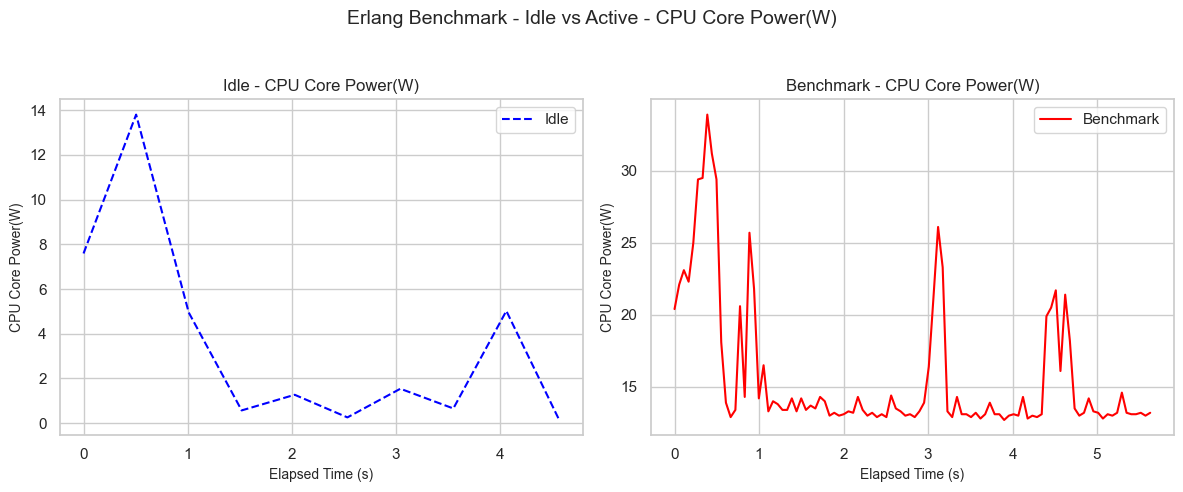

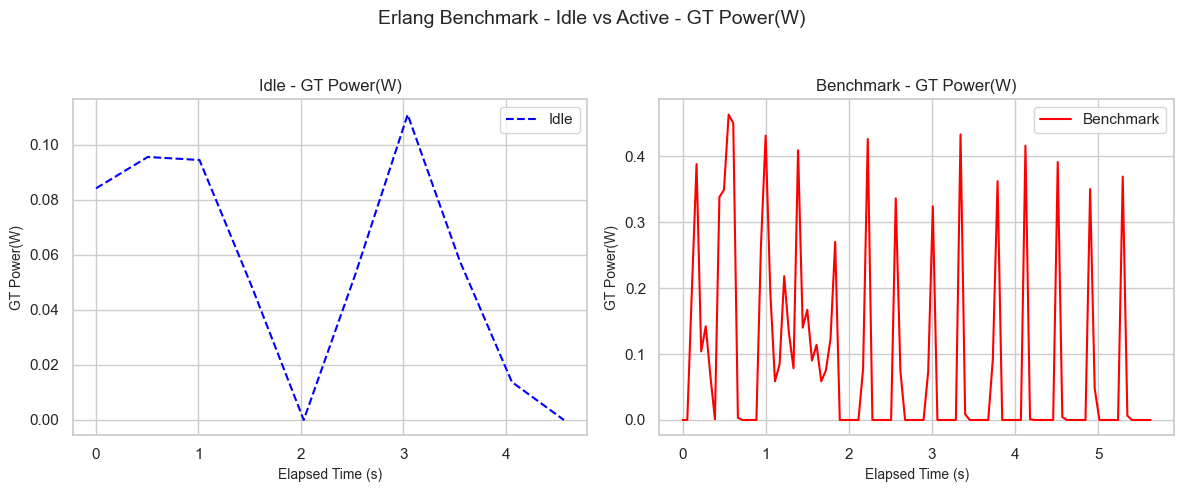

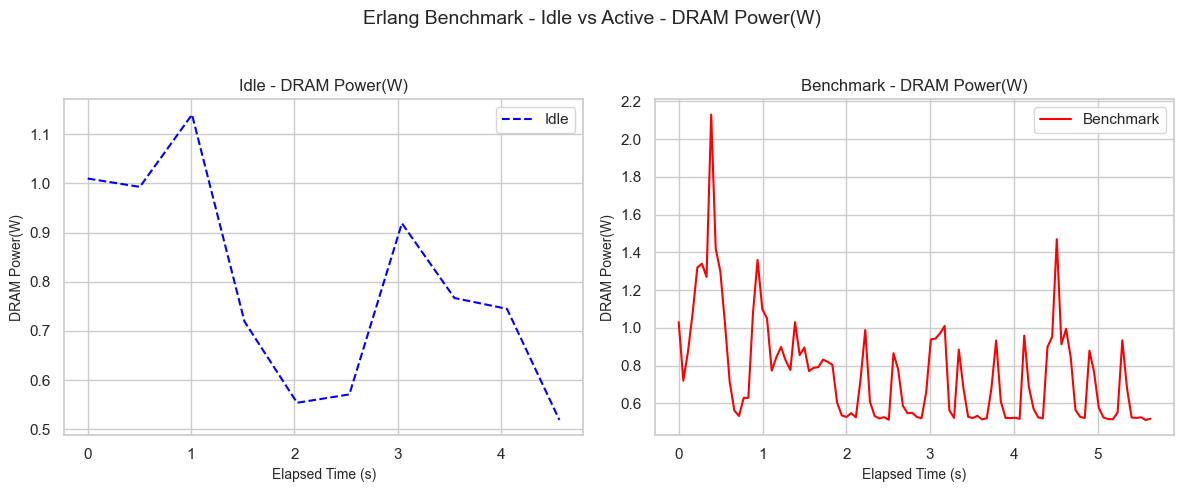

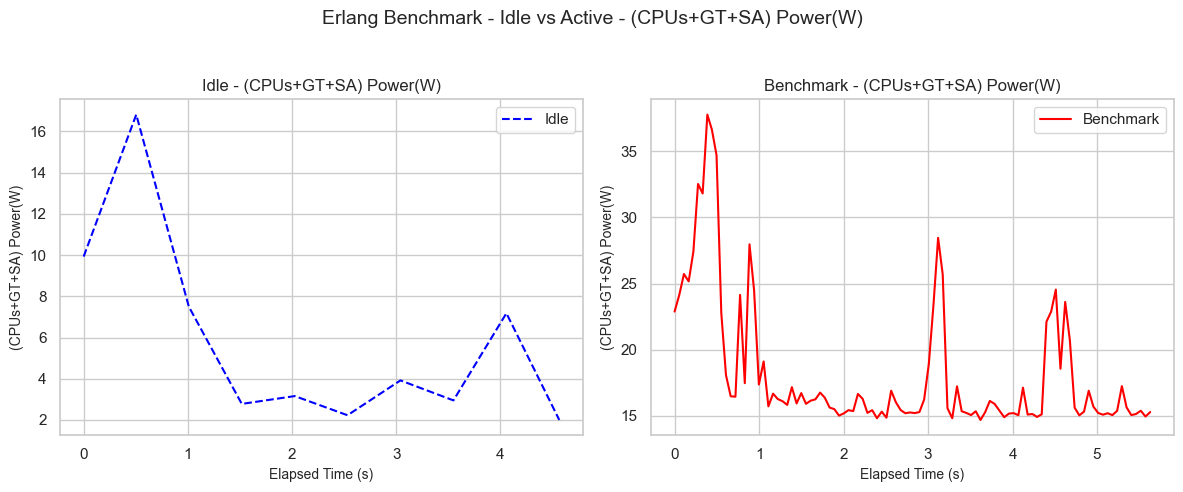

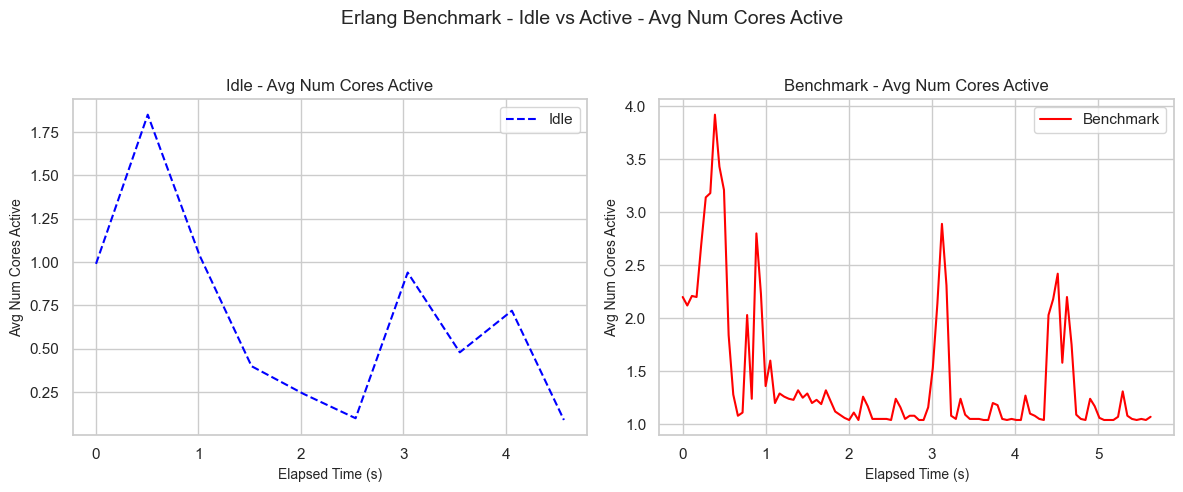

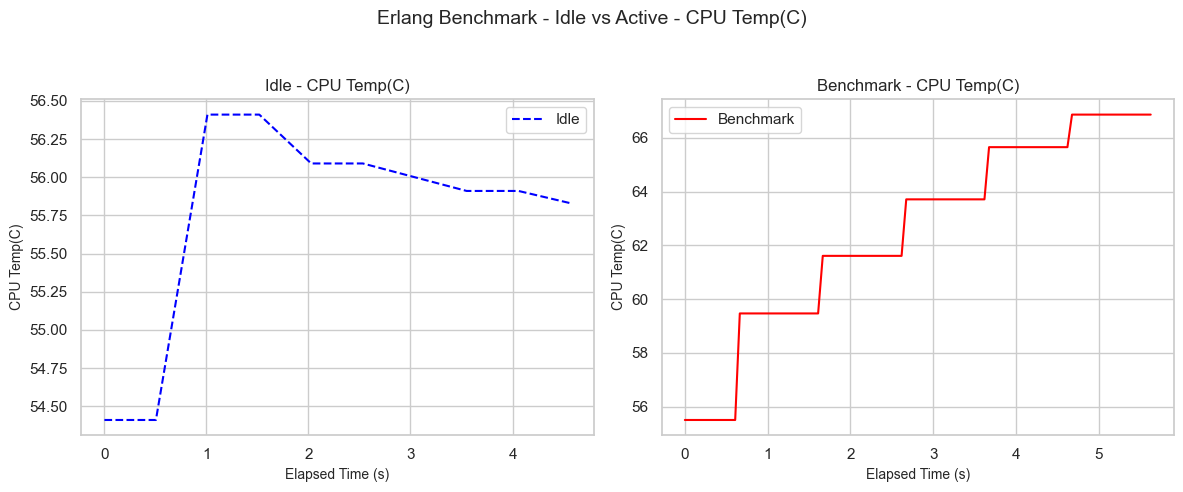

In [34]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [35]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [36]:
def format_message_count(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

message_label = format_message_count(NMSG)
title_config_prefix = f"({message_label} Messages, {ITERATIONS} Iterations)"

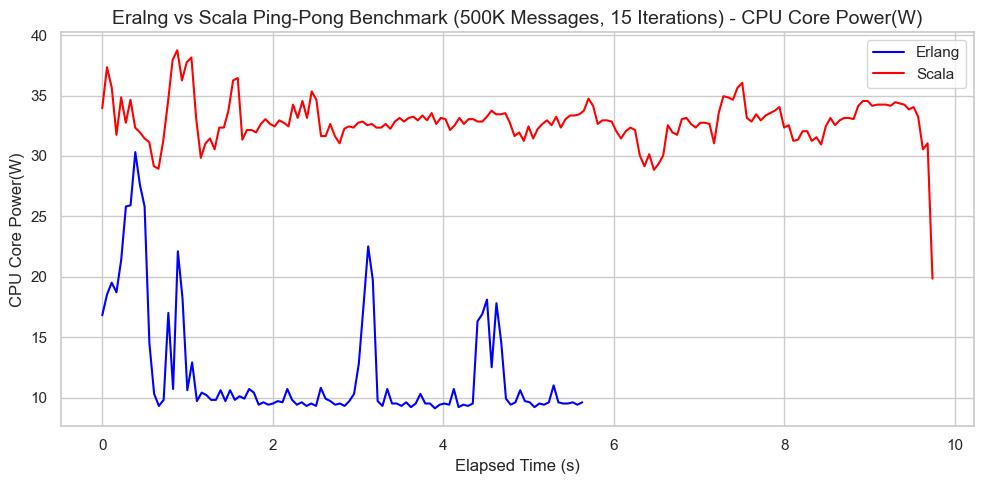

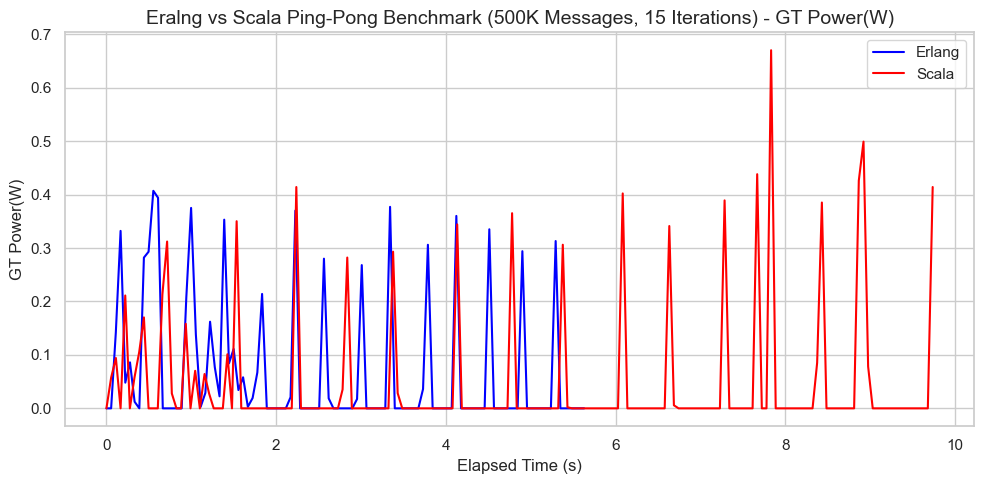

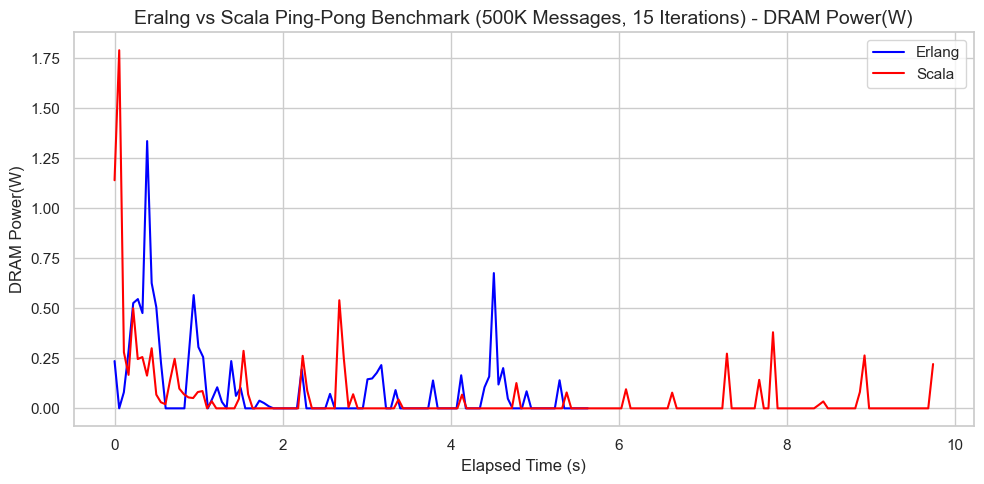

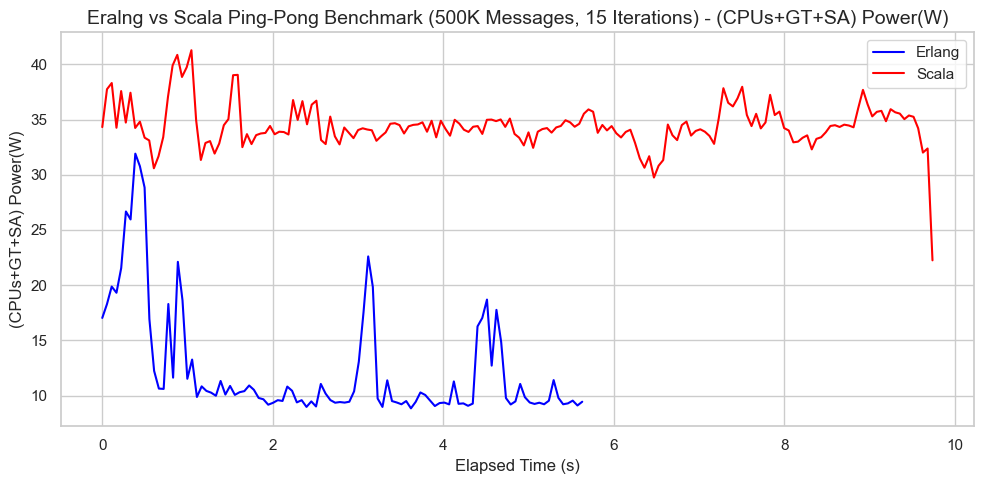

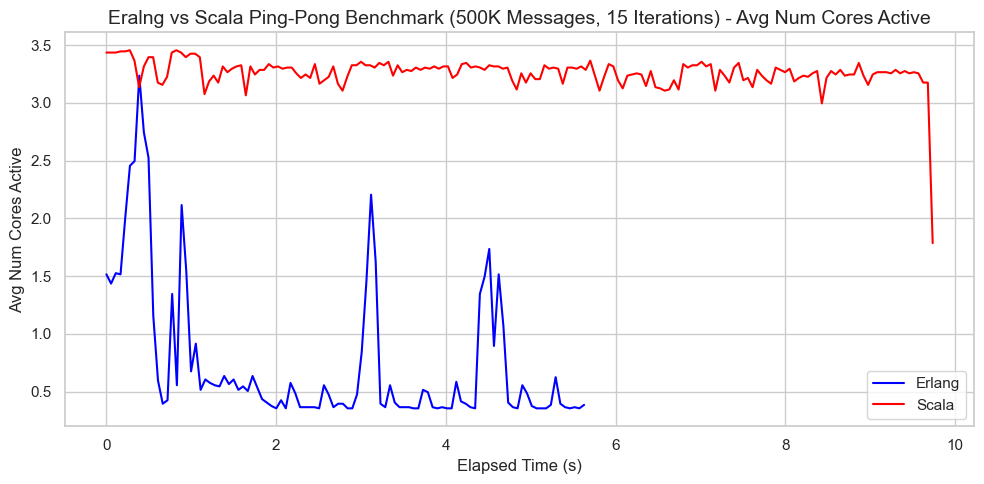

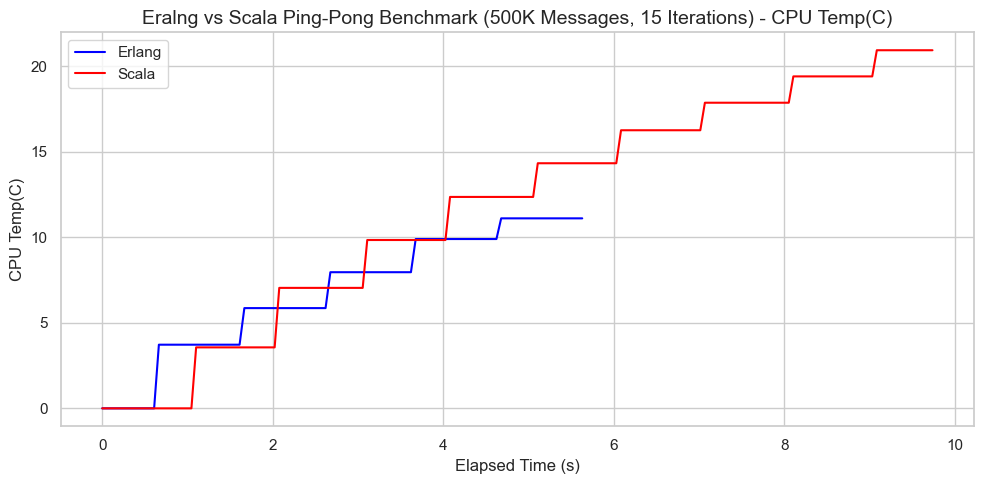

In [37]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Ping-Pong Benchmark {title_config_prefix}")


Compute Average Metrics

In [38]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [39]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        32.851689
GT Power(W)               0.018642
DRAM Power(W)            -0.052594
(CPUs+GT+SA) Power(W)    34.429167
CPU Temp(C)              11.672667
Avg Num Cores Active      3.260944
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        12.131765
GT Power(W)               0.034360
DRAM Power(W)            -0.028837
(CPUs+GT+SA) Power(W)    12.359078
CPU Temp(C)               6.777706
Avg Num Cores Active      0.750588
dtype: float64


Compute Total Energy Consumption

In [40]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Number of Messages": NMSG,
    "Iterations": ITERATIONS,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["Number of Messages"] == NMSG) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for Number of Messages =", NMSG, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../data/ping_pong/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 337.19340537499994 Joules
Erlang Benchmark: 70.27495586862744 Joules
